### Imports and functions

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# from google.cloud import storage

# client = storage.Client()
# for blob in client.list_blobs('climateai_data_repository', prefix='tmp/internal_variability'):
#   print(str(blob))

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import intake 
import pprint
# from src.LE_LoadAndMerge import *
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from copy import deepcopy
from src.multi_model_large_ensemble import MultiModelLargeEnsemble

In [4]:
# def sensitivity_test(parameter,region,x_type,load,args):
#     values = args[parameter]
#     datasets = []
#     for i in values:
#         args[parameter] = i
#         internal = region.compute_x(x_type=x_type,load=load,**args)
#         datasets.append(internal)
#     dataset = xr.concat(datasets, dim=values)
#     # dataset['MTratio'] = dataset.model_le/dataset.total_le
        
#     return dataset

In [5]:
def sensitivity_test(parameter,region,x_type,load,args):
    values = args[parameter]
    datasets = []
    for i in values:
        args[parameter] = i
        region.compute_x(x_type=x_type,load=load,**args)
        region.compute_LE()
        region.compute_FIT()
        internal = region.results
        internal = internal.squeeze()
        datasets.append(internal)
    dataset = xr.concat(datasets, dim=values)
    dataset['MTratio'] = (dataset.M_LE/(dataset.M_LE+dataset.Ibar_LE))*100
        
    return dataset

In [6]:
def sensitivity_allregions(parameter,x_type,load,args):
    regions = [USwest,europe,australia,tropics]
    dss = []
    for r in regions:
        tmp_args = deepcopy(args)
        ds = sensitivity_test(parameter=parameter,region=r,x_type=x_type,load=load,args=tmp_args)
        ds = ds.expand_dims('region')
        dss.append(ds)
    regions = ['USwest','europe','australia','tropics']
    final_dataset = xr.concat(dss,dim='region')
    final_dataset = final_dataset.assign_coords({'region':regions})
    
    return final_dataset

In [7]:
# sensitivity_test(parameter='return_period',
#                  region=USwest,
#                  x_type = 'quantile_return',
#                  load=False,
#                  name='USwest_test_return',
#                  args={'return_period':[5,10,20,50,100],
#                             'coarsen':1,
#                             'consec_days':1,
#                             'rolling_average':10,
#                             'hist_slice':slice('1995','2014')
#                       }
#                 )

In [8]:
def extreme_internal_allregions(args):
    regions = [USwest,europe,australia,tropics]
    dss = []
    for r in regions:
        internal = r.extreme_internal_variability(**args)
        internal = internal.expand_dims('region')
        dss.append(internal)
    regions = ['USwest','europe','australia','tropics']
    final_dataset = xr.concat(dss,dim='region')
    final_dataset = final_dataset.assign_coords({'region':regions})
    return final_dataset

## Global code 

In [9]:
-53.1 % 360

306.9

In [26]:
# setting 
# variable = 'tas'
# variable = 'tasmax'
variable = 'pr'
models = ['MIROC6', 'CanESM5', 'MPI-ESM1-2-LR', 'EC-Earth3','cesm_lens']

In [27]:
USwest = MultiModelLargeEnsemble(models=models, variable=variable, granularity='day', 
                               lat=37.7, lon=237.6, 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

In [28]:
europe = MultiModelLargeEnsemble(models=models, variable=variable, granularity='day', 
                               lat=51, lon=10.5, 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

In [29]:
australia = MultiModelLargeEnsemble(models=models, variable=variable, granularity='day', 
                               lat=-25.2, lon=133.7, 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

In [30]:
tropics = MultiModelLargeEnsemble(models=models, variable=variable, granularity='day', 
                               lat=3.9, lon=306.9, 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

In [31]:
test_return = sensitivity_allregions(parameter='return_period',
                 x_type='quantile_return',
                 load=False,
                 args = {'return_period':[5,10,20,50,100],
                            'coarsen':1,
                            'consec_days':1,
                            'rolling_average':10,
                            'hist_slice':slice('1995','2014')
                            })

100%|██████████| 1/1 [00:01<00:00,  1.98s/it]


8.563224792480469


100%|██████████| 1/1 [00:01<00:00,  1.96s/it]


8.56601333618164


100%|██████████| 1/1 [00:00<00:00,  1.76it/s]


8.564411163330078


100%|██████████| 1/1 [00:01<00:00,  1.90s/it]


8.567188262939453


100%|██████████| 1/1 [00:01<00:00,  1.49s/it]


8.567806243896484


100%|██████████| 1/1 [00:01<00:00,  1.85s/it]


8.572368621826172


100%|██████████| 1/1 [00:01<00:00,  1.71s/it]


8.573253631591797


100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

8.578067779541016



100%|██████████| 1/1 [00:01<00:00,  1.83s/it]


8.57421875


100%|██████████| 1/1 [00:01<00:00,  1.45s/it]


8.577537536621094


100%|██████████| 1/1 [00:01<00:00,  1.77s/it]


8.580703735351562


100%|██████████| 1/1 [00:01<00:00,  1.79s/it]


8.580314636230469


100%|██████████| 1/1 [00:00<00:00,  2.21it/s]


8.579071044921875


100%|██████████| 1/1 [00:01<00:00,  1.86s/it]


8.578620910644531


100%|██████████| 1/1 [00:01<00:00,  1.46s/it]


8.580886840820312


100%|██████████| 1/1 [00:01<00:00,  1.91s/it]


8.582649230957031


100%|██████████| 1/1 [00:01<00:00,  1.99s/it]


8.587940216064453


100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


8.58468246459961


100%|██████████| 1/1 [00:01<00:00,  1.83s/it]


8.582717895507812


100%|██████████| 1/1 [00:01<00:00,  1.50s/it]


8.584342956542969


100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


8.587135314941406


100%|██████████| 1/1 [00:01<00:00,  1.91s/it]


8.583061218261719


100%|██████████| 1/1 [00:00<00:00,  2.14it/s]


8.582054138183594


100%|██████████| 1/1 [00:01<00:00,  1.89s/it]


8.583839416503906


100%|██████████| 1/1 [00:01<00:00,  1.46s/it]


8.583885192871094


100%|██████████| 1/1 [00:01<00:00,  1.87s/it]


8.57382583618164


100%|██████████| 1/1 [00:01<00:00,  1.89s/it]


8.577259063720703


100%|██████████| 1/1 [00:00<00:00,  1.93it/s]


8.571361541748047


100%|██████████| 1/1 [00:01<00:00,  1.86s/it]


8.577571868896484


100%|██████████| 1/1 [00:01<00:00,  1.54s/it]


8.57071304321289


100%|██████████| 1/1 [00:01<00:00,  1.79s/it]


8.581745147705078


100%|██████████| 1/1 [00:01<00:00,  1.81s/it]


8.578914642333984


100%|██████████| 1/1 [00:00<00:00,  2.15it/s]


8.57827377319336


100%|██████████| 1/1 [00:01<00:00,  1.83s/it]


8.58184814453125


100%|██████████| 1/1 [00:01<00:00,  1.49s/it]


8.58151626586914


100%|██████████| 1/1 [00:02<00:00,  2.26s/it]


8.584728240966797


100%|██████████| 1/1 [00:01<00:00,  1.79s/it]


8.573448181152344


100%|██████████| 1/1 [00:00<00:00,  1.91it/s]


8.577362060546875


100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


8.571895599365234


100%|██████████| 1/1 [00:01<00:00,  1.44s/it]


8.577301025390625


100%|██████████| 1/1 [00:01<00:00,  1.84s/it]


8.5828857421875


100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


8.564899444580078


100%|██████████| 1/1 [00:00<00:00,  2.20it/s]


8.56735610961914


100%|██████████| 1/1 [00:01<00:00,  1.86s/it]


8.575664520263672


100%|██████████| 1/1 [00:01<00:00,  1.48s/it]


8.58230209350586


100%|██████████| 1/1 [00:01<00:00,  1.84s/it]


8.563255310058594


100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


8.57699966430664


100%|██████████| 1/1 [00:00<00:00,  2.15it/s]


8.572795867919922


100%|██████████| 1/1 [00:01<00:00,  1.78s/it]


8.580631256103516


100%|██████████| 1/1 [00:01<00:00,  1.46s/it]


8.580093383789062


100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


8.580917358398438


100%|██████████| 1/1 [00:01<00:00,  1.79s/it]


8.581558227539062


100%|██████████| 1/1 [00:00<00:00,  2.14it/s]


8.578598022460938


100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


8.665515899658203


100%|██████████| 1/1 [00:01<00:00,  1.48s/it]


8.584083557128906


100%|██████████| 1/1 [00:01<00:00,  1.78s/it]


8.575508117675781


100%|██████████| 1/1 [00:01<00:00,  1.81s/it]


8.578201293945312


100%|██████████| 1/1 [00:00<00:00,  2.16it/s]


8.581047058105469


100%|██████████| 1/1 [00:01<00:00,  1.56s/it]


8.579940795898438


100%|██████████| 1/1 [00:01<00:00,  1.44s/it]


8.578346252441406


100%|██████████| 1/1 [00:01<00:00,  1.74s/it]


8.579368591308594


100%|██████████| 1/1 [00:01<00:00,  1.77s/it]


8.581600189208984


100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

8.585147857666016



100%|██████████| 1/1 [00:01<00:00,  1.55s/it]


8.584148406982422


100%|██████████| 1/1 [00:01<00:00,  1.45s/it]


8.579212188720703


100%|██████████| 1/1 [00:01<00:00,  1.69s/it]


8.587295532226562


100%|██████████| 1/1 [00:01<00:00,  1.73s/it]


8.571552276611328


100%|██████████| 1/1 [00:00<00:00,  2.62it/s]


8.565052032470703


100%|██████████| 1/1 [00:01<00:00,  1.53s/it]


8.570491790771484


100%|██████████| 1/1 [00:01<00:00,  1.44s/it]


8.575080871582031


100%|██████████| 1/1 [00:01<00:00,  1.69s/it]


8.58224105834961


100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


8.57254409790039


100%|██████████| 1/1 [00:00<00:00,  2.52it/s]


8.569572448730469


100%|██████████| 1/1 [00:01<00:00,  1.51s/it]


8.570053100585938


100%|██████████| 1/1 [00:01<00:00,  1.43s/it]


8.57455062866211


100%|██████████| 1/1 [00:01<00:00,  1.88s/it]


8.58169174194336


100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


8.573211669921875


100%|██████████| 1/1 [00:00<00:00,  1.98it/s]


8.576713562011719


100%|██████████| 1/1 [00:01<00:00,  1.90s/it]


8.585643768310547


100%|██████████| 1/1 [00:01<00:00,  1.70s/it]


8.577865600585938


100%|██████████| 1/1 [00:01<00:00,  1.87s/it]


8.58176040649414


100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


8.580730438232422


100%|██████████| 1/1 [00:00<00:00,  2.12it/s]


8.582439422607422


100%|██████████| 1/1 [00:01<00:00,  1.78s/it]


8.583747863769531


100%|██████████| 1/1 [00:01<00:00,  1.39s/it]


8.58035659790039


100%|██████████| 1/1 [00:01<00:00,  1.81s/it]


8.58829116821289


100%|██████████| 1/1 [00:01<00:00,  1.88s/it]


8.582195281982422


100%|██████████| 1/1 [00:00<00:00,  2.27it/s]


8.585063934326172


100%|██████████| 1/1 [00:01<00:00,  1.83s/it]


8.577327728271484


100%|██████████| 1/1 [00:01<00:00,  1.72s/it]


8.582645416259766


100%|██████████| 1/1 [00:01<00:00,  1.78s/it]


8.567855834960938


100%|██████████| 1/1 [00:01<00:00,  1.72s/it]


8.57839584350586


100%|██████████| 1/1 [00:00<00:00,  1.80it/s]


8.670886993408203


100%|██████████| 1/1 [00:01<00:00,  1.85s/it]


8.580978393554688


100%|██████████| 1/1 [00:01<00:00,  1.41s/it]


8.585456848144531


100%|██████████| 1/1 [00:01<00:00,  1.87s/it]


8.577808380126953


100%|██████████| 1/1 [00:01<00:00,  1.85s/it]


8.593109130859375


100%|██████████| 1/1 [00:00<00:00,  2.23it/s]


8.58880615234375


100%|██████████| 1/1 [00:01<00:00,  1.77s/it]


8.591400146484375


100%|██████████| 1/1 [00:01<00:00,  1.41s/it]

8.587844848632812


In [32]:
test_histslice = sensitivity_allregions(parameter='hist_slice',
                                        x_type = 'quantile_return',
                                        load=False,
                                        args = {'return_period':10,
                                                'coarsen':1,
                                                'consec_days':1,
                                                'rolling_average':10,
                                                'hist_slice':[slice('1980','2000'),
                                                              slice('1990','2010'),slice('1995','2014'),
                                                              slice(None, None), slice('1990', None)]
                                               }
                                       )

100%|██████████| 1/1 [00:01<00:00,  1.75s/it]


8.589462280273438


100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


8.576122283935547


100%|██████████| 1/1 [00:00<00:00,  2.40it/s]


8.581478118896484


100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


8.580936431884766


100%|██████████| 1/1 [00:01<00:00,  1.39s/it]


8.583683013916016


100%|██████████| 1/1 [00:01<00:00,  1.78s/it]


8.583904266357422


100%|██████████| 1/1 [00:01<00:00,  1.79s/it]


8.58237075805664


100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


8.58017349243164


100%|██████████| 1/1 [00:01<00:00,  1.79s/it]


8.584842681884766


100%|██████████| 1/1 [00:01<00:00,  1.47s/it]


8.586257934570312


100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


8.580276489257812


100%|██████████| 1/1 [00:01<00:00,  1.77s/it]


8.580413818359375


100%|██████████| 1/1 [00:00<00:00,  2.36it/s]


8.578666687011719


100%|██████████| 1/1 [00:01<00:00,  1.80s/it]


8.58273696899414


100%|██████████| 1/1 [00:01<00:00,  1.42s/it]


8.57735824584961


100%|██████████| 1/1 [00:01<00:00,  1.84s/it]


8.572437286376953


100%|██████████| 1/1 [00:02<00:00,  2.04s/it]

8.572681427001953



100%|██████████| 1/1 [00:00<00:00,  2.28it/s]


8.571510314941406


100%|██████████| 1/1 [00:01<00:00,  1.79s/it]


8.569068908691406


100%|██████████| 1/1 [00:01<00:00,  1.53s/it]


8.567817687988281


100%|██████████| 1/1 [00:01<00:00,  1.80s/it]


8.585578918457031


100%|██████████| 1/1 [00:01<00:00,  1.77s/it]


8.58536148071289


100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


8.589405059814453


100%|██████████| 1/1 [00:01<00:00,  1.88s/it]


8.593433380126953


100%|██████████| 1/1 [00:01<00:00,  1.54s/it]


8.595779418945312


100%|██████████| 1/1 [00:01<00:00,  1.83s/it]


8.569664001464844


100%|██████████| 1/1 [00:01<00:00,  1.86s/it]


8.57833480834961


100%|██████████| 1/1 [00:00<00:00,  1.92it/s]


8.583919525146484


100%|██████████| 1/1 [00:02<00:00,  2.14s/it]


8.583240509033203


100%|██████████| 1/1 [00:01<00:00,  1.54s/it]


8.587345123291016


100%|██████████| 1/1 [00:01<00:00,  1.92s/it]


8.590259552001953


100%|██████████| 1/1 [00:01<00:00,  1.83s/it]


8.592235565185547


100%|██████████| 1/1 [00:00<00:00,  1.36it/s]


8.593402862548828


100%|██████████| 1/1 [00:01<00:00,  1.81s/it]


8.596614837646484


100%|██████████| 1/1 [00:01<00:00,  1.44s/it]


8.593242645263672


100%|██████████| 1/1 [00:01<00:00,  1.78s/it]


8.584087371826172


100%|██████████| 1/1 [00:01<00:00,  1.88s/it]


8.593589782714844


100%|██████████| 1/1 [00:00<00:00,  1.79it/s]


8.588294982910156


100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


8.595016479492188


100%|██████████| 1/1 [00:01<00:00,  1.40s/it]


8.595016479492188


100%|██████████| 1/1 [00:01<00:00,  1.85s/it]


8.577278137207031


100%|██████████| 1/1 [00:01<00:00,  1.80s/it]


8.580944061279297


100%|██████████| 1/1 [00:00<00:00,  2.22it/s]


8.582172393798828


100%|██████████| 1/1 [00:02<00:00,  2.11s/it]


8.578414916992188


100%|██████████| 1/1 [00:01<00:00,  1.50s/it]


8.576705932617188


100%|██████████| 1/1 [00:01<00:00,  1.79s/it]


8.58905029296875


100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


8.59402847290039


100%|██████████| 1/1 [00:00<00:00,  2.43it/s]


8.593891143798828


100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


8.59503173828125


100%|██████████| 1/1 [00:01<00:00,  1.55s/it]


8.593929290771484


100%|██████████| 1/1 [00:01<00:00,  1.74s/it]


8.597137451171875


100%|██████████| 1/1 [00:01<00:00,  1.85s/it]


8.601493835449219


100%|██████████| 1/1 [00:00<00:00,  2.54it/s]


8.602020263671875


100%|██████████| 1/1 [00:01<00:00,  1.64s/it]


8.593086242675781


100%|██████████| 1/1 [00:01<00:00,  1.48s/it]


8.599967956542969


100%|██████████| 1/1 [00:01<00:00,  1.77s/it]


8.597671508789062


100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


8.587699890136719


100%|██████████| 1/1 [00:00<00:00,  2.21it/s]


8.591682434082031


100%|██████████| 1/1 [00:01<00:00,  1.56s/it]


8.582054138183594


100%|██████████| 1/1 [00:01<00:00,  1.44s/it]


8.597461700439453


100%|██████████| 1/1 [00:01<00:00,  1.81s/it]


8.594585418701172


100%|██████████| 1/1 [00:01<00:00,  1.83s/it]


8.59347915649414


100%|██████████| 1/1 [00:00<00:00,  2.57it/s]


8.58791732788086


100%|██████████| 1/1 [00:01<00:00,  1.50s/it]


8.59115982055664


100%|██████████| 1/1 [00:01<00:00,  1.41s/it]


8.593082427978516


100%|██████████| 1/1 [00:01<00:00,  1.74s/it]


8.575199127197266


100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


8.577072143554688


100%|██████████| 1/1 [00:00<00:00,  2.54it/s]


8.573963165283203


100%|██████████| 1/1 [00:01<00:00,  1.67s/it]


8.585689544677734


100%|██████████| 1/1 [00:01<00:00,  1.44s/it]


8.582138061523438


100%|██████████| 1/1 [00:01<00:00,  1.74s/it]


8.591148376464844


100%|██████████| 1/1 [00:02<00:00,  2.04s/it]


8.58993911743164


100%|██████████| 1/1 [00:00<00:00,  2.52it/s]


8.594196319580078


100%|██████████| 1/1 [00:01<00:00,  1.58s/it]


8.5928955078125


100%|██████████| 1/1 [00:01<00:00,  1.41s/it]


8.593116760253906


100%|██████████| 1/1 [00:01<00:00,  1.96s/it]


8.575077056884766


100%|██████████| 1/1 [00:01<00:00,  1.79s/it]


8.579296112060547


100%|██████████| 1/1 [00:00<00:00,  2.08it/s]


8.577774047851562


100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


8.585186004638672


100%|██████████| 1/1 [00:01<00:00,  1.53s/it]


8.585384368896484


100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


8.588130950927734


100%|██████████| 1/1 [00:01<00:00,  1.74s/it]


8.593563079833984


100%|██████████| 1/1 [00:00<00:00,  2.00it/s]


8.586566925048828


100%|██████████| 1/1 [00:01<00:00,  1.86s/it]


8.585338592529297


100%|██████████| 1/1 [00:01<00:00,  1.41s/it]


8.586776733398438


100%|██████████| 1/1 [00:01<00:00,  1.77s/it]


8.586418151855469


100%|██████████| 1/1 [00:01<00:00,  1.75s/it]


8.589447021484375


100%|██████████| 1/1 [00:00<00:00,  2.01it/s]


8.590797424316406


100%|██████████| 1/1 [00:01<00:00,  1.79s/it]


8.5853271484375


100%|██████████| 1/1 [00:01<00:00,  1.41s/it]


8.593502044677734


100%|██████████| 1/1 [00:01<00:00,  1.87s/it]


8.570331573486328


100%|██████████| 1/1 [00:01<00:00,  1.79s/it]


8.580551147460938


100%|██████████| 1/1 [00:00<00:00,  2.13it/s]


8.574657440185547


100%|██████████| 1/1 [00:01<00:00,  1.84s/it]


8.571006774902344


100%|██████████| 1/1 [00:01<00:00,  1.51s/it]


8.572059631347656


100%|██████████| 1/1 [00:01<00:00,  1.87s/it]


8.585113525390625


100%|██████████| 1/1 [00:01<00:00,  1.84s/it]


8.58810043334961


100%|██████████| 1/1 [00:00<00:00,  2.30it/s]


8.582611083984375


100%|██████████| 1/1 [00:02<00:00,  2.13s/it]


8.584266662597656


100%|██████████| 1/1 [00:01<00:00,  1.68s/it]

8.58270263671875


In [33]:
test_coarsen = sensitivity_allregions(parameter='coarsen',
                                    x_type = 'quantile_return',
                                    load=False,
                                    args = {'return_period':10,
                                            'coarsen':[1,3,5,7],
                                            'consec_days':1,
                                            'rolling_average':10,
                                            'hist_slice':slice('1995','2014')
                                            
                                           })

100%|██████████| 1/1 [00:01<00:00,  1.79s/it]


8.585296630859375


100%|██████████| 1/1 [00:01<00:00,  1.73s/it]


8.585243225097656


100%|██████████| 1/1 [00:00<00:00,  2.17it/s]


8.581634521484375


100%|██████████| 1/1 [00:01<00:00,  1.93s/it]


8.588397979736328


100%|██████████| 1/1 [00:01<00:00,  1.58s/it]


8.595294952392578


100%|██████████| 1/1 [00:02<00:00,  2.01s/it]


8.600410461425781


100%|██████████| 1/1 [00:01<00:00,  1.79s/it]


8.595001220703125


100%|██████████| 1/1 [00:00<00:00,  1.89it/s]


8.592601776123047


100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


8.597816467285156


100%|██████████| 1/1 [00:01<00:00,  1.63s/it]


8.596343994140625


100%|██████████| 1/1 [00:01<00:00,  1.85s/it]


8.596771240234375


100%|██████████| 1/1 [00:01<00:00,  1.81s/it]


8.599044799804688


100%|██████████| 1/1 [00:00<00:00,  2.14it/s]


8.596549987792969


100%|██████████| 1/1 [00:01<00:00,  1.98s/it]


8.593254089355469


100%|██████████| 1/1 [00:01<00:00,  1.49s/it]


8.599655151367188


100%|██████████| 1/1 [00:01<00:00,  1.83s/it]


8.591606140136719


100%|██████████| 1/1 [00:01<00:00,  1.77s/it]


8.580886840820312


100%|██████████| 1/1 [00:00<00:00,  2.19it/s]


8.5797119140625


100%|██████████| 1/1 [00:01<00:00,  1.78s/it]


8.584220886230469


100%|██████████| 1/1 [00:01<00:00,  1.42s/it]


8.593605041503906


100%|██████████| 1/1 [00:01<00:00,  1.83s/it]


8.591545104980469


100%|██████████| 1/1 [00:01<00:00,  1.81s/it]


8.597801208496094


100%|██████████| 1/1 [00:00<00:00,  2.08it/s]


8.591262817382812


100%|██████████| 1/1 [00:01<00:00,  1.91s/it]


8.589385986328125


100%|██████████| 1/1 [00:01<00:00,  1.54s/it]


8.597400665283203


100%|██████████| 1/1 [00:02<00:00,  2.09s/it]


8.591346740722656


100%|██████████| 1/1 [00:01<00:00,  1.78s/it]


8.595962524414062


100%|██████████| 1/1 [00:00<00:00,  2.44it/s]


8.588790893554688


100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


8.597450256347656


100%|██████████| 1/1 [00:01<00:00,  1.42s/it]


8.590141296386719


100%|██████████| 1/1 [00:01<00:00,  1.91s/it]


8.594768524169922


100%|██████████| 1/1 [00:01<00:00,  1.75s/it]


8.598979949951172


100%|██████████| 1/1 [00:00<00:00,  2.43it/s]


8.59371566772461


100%|██████████| 1/1 [00:01<00:00,  1.78s/it]


8.597110748291016


100%|██████████| 1/1 [00:01<00:00,  1.39s/it]


8.591300964355469


100%|██████████| 1/1 [00:01<00:00,  1.80s/it]


8.590805053710938


100%|██████████| 1/1 [00:01<00:00,  1.74s/it]


8.59912109375


100%|██████████| 1/1 [00:00<00:00,  2.39it/s]


8.591537475585938


100%|██████████| 1/1 [00:01<00:00,  1.78s/it]


8.597152709960938


100%|██████████| 1/1 [00:01<00:00,  1.47s/it]


8.591606140136719


100%|██████████| 1/1 [00:01<00:00,  1.71s/it]


8.594245910644531


100%|██████████| 1/1 [00:01<00:00,  1.95s/it]


8.592681884765625


100%|██████████| 1/1 [00:00<00:00,  2.42it/s]


8.595375061035156


100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


8.59897232055664


100%|██████████| 1/1 [00:01<00:00,  1.44s/it]


8.596736907958984


100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


8.595691680908203


100%|██████████| 1/1 [00:01<00:00,  1.90s/it]


8.597465515136719


100%|██████████| 1/1 [00:00<00:00,  2.61it/s]


8.593948364257812


100%|██████████| 1/1 [00:01<00:00,  1.52s/it]


8.599449157714844


100%|██████████| 1/1 [00:01<00:00,  1.40s/it]


8.59320068359375


100%|██████████| 1/1 [00:01<00:00,  1.77s/it]


8.597274780273438


100%|██████████| 1/1 [00:01<00:00,  1.79s/it]


8.594135284423828


100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

8.598751068115234



100%|██████████| 1/1 [00:01<00:00,  1.55s/it]


8.59781265258789


100%|██████████| 1/1 [00:01<00:00,  1.44s/it]


8.616683959960938


100%|██████████| 1/1 [00:01<00:00,  1.73s/it]


8.61727523803711


100%|██████████| 1/1 [00:01<00:00,  1.75s/it]


8.779071807861328


100%|██████████| 1/1 [00:00<00:00,  2.33it/s]


8.600776672363281


100%|██████████| 1/1 [00:01<00:00,  1.50s/it]


8.590110778808594


100%|██████████| 1/1 [00:01<00:00,  1.41s/it]


8.593883514404297


100%|██████████| 1/1 [00:01<00:00,  1.77s/it]


8.595317840576172


100%|██████████| 1/1 [00:01<00:00,  1.85s/it]


8.59027099609375


100%|██████████| 1/1 [00:00<00:00,  2.40it/s]


8.586898803710938


100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


8.588546752929688


100%|██████████| 1/1 [00:01<00:00,  1.41s/it]


8.594650268554688


100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


8.588077545166016


100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


8.58945083618164


100%|██████████| 1/1 [00:00<00:00,  2.21it/s]


8.589839935302734


100%|██████████| 1/1 [00:01<00:00,  1.84s/it]


8.592666625976562


100%|██████████| 1/1 [00:01<00:00,  1.49s/it]


8.592262268066406


100%|██████████| 1/1 [00:01<00:00,  1.83s/it]


8.600292205810547


100%|██████████| 1/1 [00:01<00:00,  1.83s/it]


8.596179962158203


100%|██████████| 1/1 [00:00<00:00,  2.36it/s]


8.60000991821289


100%|██████████| 1/1 [00:01<00:00,  1.83s/it]


8.59665298461914


100%|██████████| 1/1 [00:01<00:00,  1.40s/it]


8.595996856689453


100%|██████████| 1/1 [00:01<00:00,  1.75s/it]


8.591960906982422


100%|██████████| 1/1 [00:01<00:00,  1.71s/it]


8.59109878540039


100%|██████████| 1/1 [00:00<00:00,  2.48it/s]


8.591987609863281


100%|██████████| 1/1 [00:01<00:00,  1.80s/it]


8.587486267089844


100%|██████████| 1/1 [00:01<00:00,  1.85s/it]

8.585376739501953


In [34]:
test_conseq = sensitivity_allregions(parameter='consec_days',
                                     x_type='quantile_return',
                                     load=False,
                       args= {'return_period':10,
                              'coarsen':1,
                              'consec_days':[1,3,5,7],
                              'rolling_average':10,
                              'hist_slice':slice('1995','2014')
                             }
                      )

100%|██████████| 1/1 [00:02<00:00,  2.03s/it]


8.581283569335938


100%|██████████| 1/1 [00:01<00:00,  1.85s/it]


8.5906982421875


100%|██████████| 1/1 [00:00<00:00,  1.91it/s]


8.592704772949219


100%|██████████| 1/1 [00:01<00:00,  1.78s/it]


8.586956024169922


100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


8.588165283203125


100%|██████████| 1/1 [00:02<00:00,  2.55s/it]


8.600318908691406


100%|██████████| 1/1 [00:02<00:00,  2.33s/it]


8.59930419921875


100%|██████████| 1/1 [00:00<00:00,  1.97it/s]


8.596794128417969


100%|██████████| 1/1 [00:02<00:00,  2.57s/it]


8.602500915527344


100%|██████████| 1/1 [00:02<00:00,  2.26s/it]


8.594207763671875


100%|██████████| 1/1 [00:02<00:00,  2.36s/it]


8.59743881225586


100%|██████████| 1/1 [00:02<00:00,  2.49s/it]


8.597686767578125


100%|██████████| 1/1 [00:00<00:00,  1.86it/s]


8.597579956054688


100%|██████████| 1/1 [00:02<00:00,  2.54s/it]


8.600250244140625


100%|██████████| 1/1 [00:01<00:00,  1.86s/it]


8.600868225097656


100%|██████████| 1/1 [00:02<00:00,  2.69s/it]


8.601688385009766


100%|██████████| 1/1 [00:02<00:00,  2.36s/it]


8.601207733154297


100%|██████████| 1/1 [00:00<00:00,  1.99it/s]


8.600383758544922


100%|██████████| 1/1 [00:02<00:00,  2.53s/it]


8.594970703125


100%|██████████| 1/1 [00:01<00:00,  1.90s/it]


8.590080261230469


100%|██████████| 1/1 [00:01<00:00,  1.85s/it]


8.589462280273438


100%|██████████| 1/1 [00:01<00:00,  1.77s/it]


8.59695816040039


100%|██████████| 1/1 [00:00<00:00,  2.19it/s]


8.596527099609375


100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


8.588531494140625


100%|██████████| 1/1 [00:01<00:00,  1.41s/it]


8.594581604003906


100%|██████████| 1/1 [00:02<00:00,  2.66s/it]


8.59823226928711


100%|██████████| 1/1 [00:02<00:00,  2.29s/it]


8.589923858642578


100%|██████████| 1/1 [00:00<00:00,  2.00it/s]


8.600154876708984


100%|██████████| 1/1 [00:02<00:00,  2.54s/it]


8.59958267211914


100%|██████████| 1/1 [00:01<00:00,  1.89s/it]


8.598590850830078


100%|██████████| 1/1 [00:02<00:00,  2.34s/it]


8.600032806396484


100%|██████████| 1/1 [00:02<00:00,  2.75s/it]


8.597412109375


100%|██████████| 1/1 [00:00<00:00,  1.86it/s]


8.5992431640625


100%|██████████| 1/1 [00:02<00:00,  2.56s/it]


8.601593017578125


100%|██████████| 1/1 [00:01<00:00,  1.94s/it]


8.594154357910156


100%|██████████| 1/1 [00:02<00:00,  2.41s/it]


8.596797943115234


100%|██████████| 1/1 [00:02<00:00,  2.40s/it]


8.605464935302734


100%|██████████| 1/1 [00:00<00:00,  1.94it/s]


8.60165786743164


100%|██████████| 1/1 [00:02<00:00,  2.85s/it]


8.600139617919922


100%|██████████| 1/1 [00:01<00:00,  1.83s/it]


8.600078582763672


100%|██████████| 1/1 [00:01<00:00,  1.78s/it]


8.587242126464844


100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


8.59054183959961


100%|██████████| 1/1 [00:00<00:00,  2.58it/s]


8.587833404541016


100%|██████████| 1/1 [00:01<00:00,  1.59s/it]


8.590084075927734


100%|██████████| 1/1 [00:01<00:00,  1.42s/it]


8.60232925415039


100%|██████████| 1/1 [00:02<00:00,  2.29s/it]


8.59554672241211


100%|██████████| 1/1 [00:02<00:00,  2.34s/it]


8.598045349121094


100%|██████████| 1/1 [00:00<00:00,  2.12it/s]


8.594085693359375


100%|██████████| 1/1 [00:02<00:00,  2.55s/it]


8.605430603027344


100%|██████████| 1/1 [00:01<00:00,  1.93s/it]


8.593338012695312


100%|██████████| 1/1 [00:02<00:00,  2.35s/it]


8.600021362304688


100%|██████████| 1/1 [00:02<00:00,  2.41s/it]


8.60544204711914


100%|██████████| 1/1 [00:00<00:00,  2.02it/s]


8.592716217041016


100%|██████████| 1/1 [00:02<00:00,  2.28s/it]

8.59719467163086



100%|██████████| 1/1 [00:01<00:00,  1.88s/it]

8.57857894897461



100%|██████████| 1/1 [00:02<00:00,  2.27s/it]


8.584159851074219


100%|██████████| 1/1 [00:02<00:00,  2.36s/it]


8.586158752441406


100%|██████████| 1/1 [00:00<00:00,  2.04it/s]


8.589759826660156


100%|██████████| 1/1 [00:02<00:00,  2.31s/it]


8.590927124023438


100%|██████████| 1/1 [00:01<00:00,  1.87s/it]


8.596805572509766


100%|██████████| 1/1 [00:02<00:00,  2.05s/it]


8.585887908935547


100%|██████████| 1/1 [00:01<00:00,  1.79s/it]


8.59323501586914


100%|██████████| 1/1 [00:00<00:00,  2.11it/s]


8.593914031982422


100%|██████████| 1/1 [00:02<00:00,  2.02s/it]


8.595123291015625


100%|██████████| 1/1 [00:01<00:00,  1.42s/it]


8.594863891601562


100%|██████████| 1/1 [00:02<00:00,  2.34s/it]


8.600074768066406


100%|██████████| 1/1 [00:02<00:00,  2.35s/it]


8.604301452636719


100%|██████████| 1/1 [00:00<00:00,  1.67it/s]


8.605766296386719


100%|██████████| 1/1 [00:02<00:00,  2.58s/it]


8.605148315429688


100%|██████████| 1/1 [00:01<00:00,  1.94s/it]

8.588630676269531



100%|██████████| 1/1 [00:02<00:00,  2.36s/it]


8.585201263427734


100%|██████████| 1/1 [00:02<00:00,  2.49s/it]


8.583499908447266


100%|██████████| 1/1 [00:00<00:00,  1.82it/s]


8.58834457397461


100%|██████████| 1/1 [00:02<00:00,  2.53s/it]


8.58612060546875


100%|██████████| 1/1 [00:01<00:00,  1.88s/it]


8.589492797851562


100%|██████████| 1/1 [00:02<00:00,  2.67s/it]


8.578559875488281


100%|██████████| 1/1 [00:02<00:00,  2.33s/it]


8.580093383789062


100%|██████████| 1/1 [00:00<00:00,  1.90it/s]


8.582168579101562


100%|██████████| 1/1 [00:02<00:00,  2.58s/it]


8.59267807006836


100%|██████████| 1/1 [00:02<00:00,  2.01s/it]

8.586578369140625


In [35]:
test_rolling = sensitivity_allregions(parameter='rolling_average',
                                       x_type='quantile_return',
                                     load=False,
                                        args = {'return_period':10,
                                                'coarsen':1,
                                                'consec_days':1,
                                                'rolling_average':[1,5,10,15,20],
                                                'hist_slice':slice('1995','2014')
                                               }
                                     )

100%|██████████| 1/1 [00:01<00:00,  1.84s/it]


8.5965576171875


100%|██████████| 1/1 [00:01<00:00,  1.84s/it]


8.590721130371094


100%|██████████| 1/1 [00:00<00:00,  1.58it/s]


8.601924896240234


100%|██████████| 1/1 [00:01<00:00,  1.98s/it]


8.594444274902344


100%|██████████| 1/1 [00:01<00:00,  1.48s/it]


8.593696594238281


100%|██████████| 1/1 [00:01<00:00,  1.79s/it]


8.592430114746094


100%|██████████| 1/1 [00:01<00:00,  1.80s/it]


8.597251892089844


100%|██████████| 1/1 [00:00<00:00,  2.04it/s]


8.594749450683594


100%|██████████| 1/1 [00:01<00:00,  1.77s/it]


8.595573425292969


100%|██████████| 1/1 [00:01<00:00,  1.46s/it]


8.582462310791016


100%|██████████| 1/1 [00:02<00:00,  2.17s/it]


8.598152160644531


100%|██████████| 1/1 [00:01<00:00,  1.79s/it]


8.595428466796875


100%|██████████| 1/1 [00:00<00:00,  1.94it/s]


8.594184875488281


100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


8.592201232910156


100%|██████████| 1/1 [00:01<00:00,  1.99s/it]


8.601821899414062


100%|██████████| 1/1 [00:01<00:00,  1.78s/it]


8.602790832519531


100%|██████████| 1/1 [00:01<00:00,  1.90s/it]


8.60018539428711


100%|██████████| 1/1 [00:00<00:00,  1.99it/s]


8.60220718383789


100%|██████████| 1/1 [00:01<00:00,  1.83s/it]


8.59786605834961


100%|██████████| 1/1 [00:01<00:00,  1.42s/it]


8.59906005859375


100%|██████████| 1/1 [00:01<00:00,  1.81s/it]


8.60544204711914


100%|██████████| 1/1 [00:01<00:00,  1.78s/it]


8.60586929321289


100%|██████████| 1/1 [00:00<00:00,  2.49it/s]


8.604351043701172


100%|██████████| 1/1 [00:01<00:00,  1.80s/it]


8.606311798095703


100%|██████████| 1/1 [00:01<00:00,  1.47s/it]


8.599674224853516


100%|██████████| 1/1 [00:01<00:00,  1.96s/it]


8.594104766845703


100%|██████████| 1/1 [00:02<00:00,  2.02s/it]


8.597679138183594


100%|██████████| 1/1 [00:00<00:00,  2.26it/s]


8.600639343261719


100%|██████████| 1/1 [00:01<00:00,  1.90s/it]


8.594886779785156


100%|██████████| 1/1 [00:01<00:00,  1.43s/it]


8.599655151367188


100%|██████████| 1/1 [00:02<00:00,  2.02s/it]


8.59653091430664


100%|██████████| 1/1 [00:01<00:00,  1.77s/it]


8.599178314208984


100%|██████████| 1/1 [00:00<00:00,  2.13it/s]


8.599781036376953


100%|██████████| 1/1 [00:01<00:00,  1.84s/it]


8.592510223388672


100%|██████████| 1/1 [00:01<00:00,  1.63s/it]


8.595252990722656


100%|██████████| 1/1 [00:01<00:00,  1.79s/it]


8.60196304321289


100%|██████████| 1/1 [00:01<00:00,  1.78s/it]


8.600967407226562


100%|██████████| 1/1 [00:00<00:00,  1.65it/s]


8.601188659667969


100%|██████████| 1/1 [00:02<00:00,  2.14s/it]


8.598991394042969


100%|██████████| 1/1 [00:01<00:00,  1.45s/it]


8.6053466796875


100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


8.607528686523438


100%|██████████| 1/1 [00:01<00:00,  1.90s/it]


8.604446411132812


100%|██████████| 1/1 [00:00<00:00,  2.09it/s]


8.606246948242188


100%|██████████| 1/1 [00:01<00:00,  1.78s/it]


8.599807739257812


100%|██████████| 1/1 [00:01<00:00,  1.39s/it]


8.605339050292969


100%|██████████| 1/1 [00:01<00:00,  1.74s/it]


8.607154846191406


100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


8.599838256835938


100%|██████████| 1/1 [00:00<00:00,  2.43it/s]


8.602020263671875


100%|██████████| 1/1 [00:01<00:00,  1.78s/it]


8.606712341308594


100%|██████████| 1/1 [00:01<00:00,  1.39s/it]


8.601364135742188


100%|██████████| 1/1 [00:01<00:00,  1.88s/it]


8.5987548828125


100%|██████████| 1/1 [00:01<00:00,  1.84s/it]


8.728290557861328


100%|██████████| 1/1 [00:00<00:00,  2.56it/s]


8.607498168945312


100%|██████████| 1/1 [00:01<00:00,  1.57s/it]


8.60831069946289


100%|██████████| 1/1 [00:01<00:00,  1.42s/it]


8.606517791748047


100%|██████████| 1/1 [00:01<00:00,  1.75s/it]


8.604602813720703


100%|██████████| 1/1 [00:01<00:00,  1.80s/it]


8.609371185302734


100%|██████████| 1/1 [00:00<00:00,  2.58it/s]


8.60306167602539


100%|██████████| 1/1 [00:01<00:00,  1.51s/it]


8.606273651123047


100%|██████████| 1/1 [00:01<00:00,  1.43s/it]


8.610851287841797


100%|██████████| 1/1 [00:01<00:00,  1.69s/it]


8.606983184814453


100%|██████████| 1/1 [00:01<00:00,  1.74s/it]


8.606060028076172


100%|██████████| 1/1 [00:00<00:00,  2.39it/s]


8.609004974365234


100%|██████████| 1/1 [00:01<00:00,  1.53s/it]


8.604312896728516


100%|██████████| 1/1 [00:01<00:00,  1.45s/it]


8.606914520263672


100%|██████████| 1/1 [00:02<00:00,  2.06s/it]


8.603008270263672


100%|██████████| 1/1 [00:01<00:00,  1.83s/it]


8.610401153564453


100%|██████████| 1/1 [00:00<00:00,  2.56it/s]


8.606487274169922


100%|██████████| 1/1 [00:01<00:00,  1.53s/it]


8.605716705322266


100%|██████████| 1/1 [00:01<00:00,  1.43s/it]


8.602508544921875


100%|██████████| 1/1 [00:01<00:00,  1.72s/it]


8.597789764404297


100%|██████████| 1/1 [00:01<00:00,  1.71s/it]


8.604015350341797


100%|██████████| 1/1 [00:00<00:00,  2.47it/s]


8.598331451416016


100%|██████████| 1/1 [00:01<00:00,  1.61s/it]


8.597698211669922


100%|██████████| 1/1 [00:01<00:00,  1.40s/it]


8.601390838623047


100%|██████████| 1/1 [00:01<00:00,  1.84s/it]


8.601207733154297


100%|██████████| 1/1 [00:01<00:00,  1.79s/it]


8.589641571044922


100%|██████████| 1/1 [00:00<00:00,  2.30it/s]


8.600791931152344


100%|██████████| 1/1 [00:01<00:00,  1.84s/it]


8.599205017089844


100%|██████████| 1/1 [00:01<00:00,  1.43s/it]


8.59869384765625


100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


8.60416030883789


100%|██████████| 1/1 [00:01<00:00,  1.75s/it]


8.595172882080078


100%|██████████| 1/1 [00:00<00:00,  1.54it/s]


8.599357604980469


100%|██████████| 1/1 [00:01<00:00,  1.78s/it]


8.597869873046875


100%|██████████| 1/1 [00:01<00:00,  1.40s/it]


8.59103775024414


100%|██████████| 1/1 [00:01<00:00,  1.86s/it]


8.595417022705078


100%|██████████| 1/1 [00:01<00:00,  1.90s/it]


8.604225158691406


100%|██████████| 1/1 [00:00<00:00,  2.36it/s]


8.600967407226562


100%|██████████| 1/1 [00:01<00:00,  1.87s/it]


8.60317611694336


100%|██████████| 1/1 [00:01<00:00,  1.42s/it]


8.60342025756836


100%|██████████| 1/1 [00:01<00:00,  1.91s/it]


8.609878540039062


100%|██████████| 1/1 [00:01<00:00,  1.72s/it]


8.606304168701172


100%|██████████| 1/1 [00:00<00:00,  2.30it/s]


8.602710723876953


100%|██████████| 1/1 [00:02<00:00,  2.08s/it]


8.604801177978516


100%|██████████| 1/1 [00:01<00:00,  1.59s/it]


8.607307434082031


100%|██████████| 1/1 [00:01<00:00,  1.80s/it]


8.602344512939453


100%|██████████| 1/1 [00:01<00:00,  1.72s/it]


8.60489273071289


100%|██████████| 1/1 [00:00<00:00,  2.42it/s]


8.593269348144531


100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


8.607963562011719


100%|██████████| 1/1 [00:01<00:00,  1.40s/it]

8.599998474121094


### plots

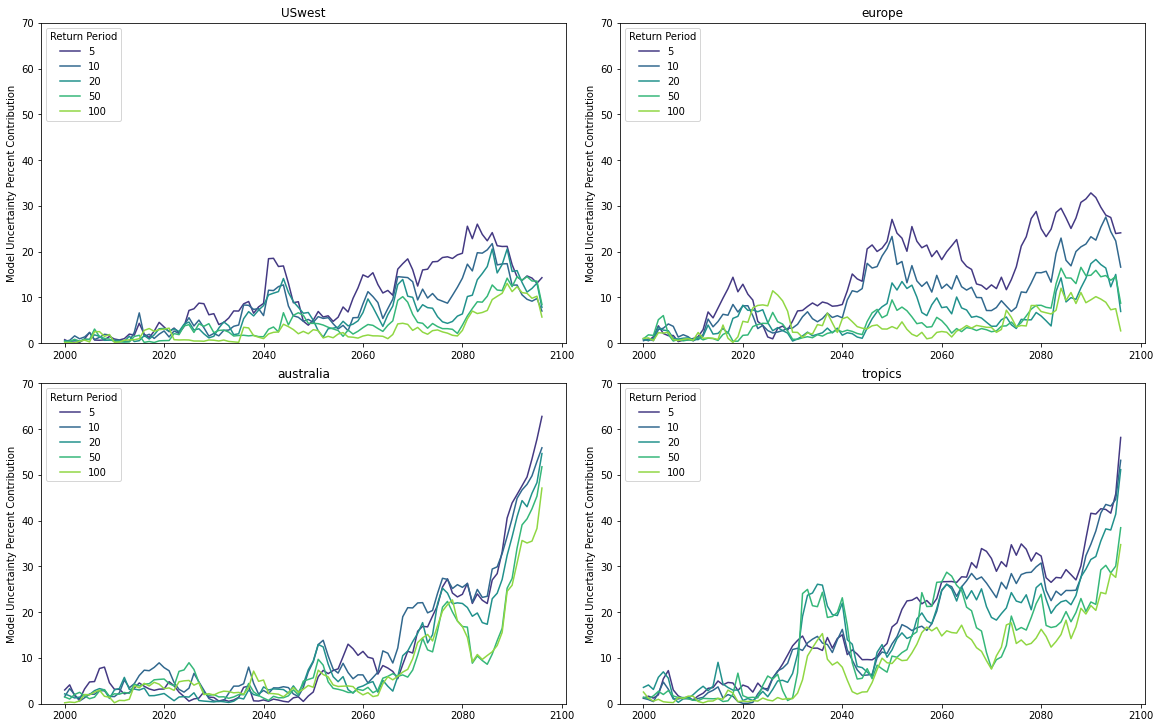

In [43]:
fig,ax = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(16,10))
colors = sns.color_palette("viridis", len(test_return.concat_dim))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
regions = ['USwest','europe','australia','tropics']
for axe,r in zip(axes,regions):
    for i,m in enumerate(test_return.concat_dim):
        axe.plot(test_return.sel(region=r,concat_dim=m).time,test_return.sel(region=r,concat_dim=m).MTratio,
                c=colors[i])
        labels=['5','10','20','50','100']
        axe.legend(labels=labels,loc=2,title='Return Period')
        axe.set_ylabel('Model Uncertainty Percent Contribution')
        axe.set_title(r)
        axe.set_ylim(0,70)

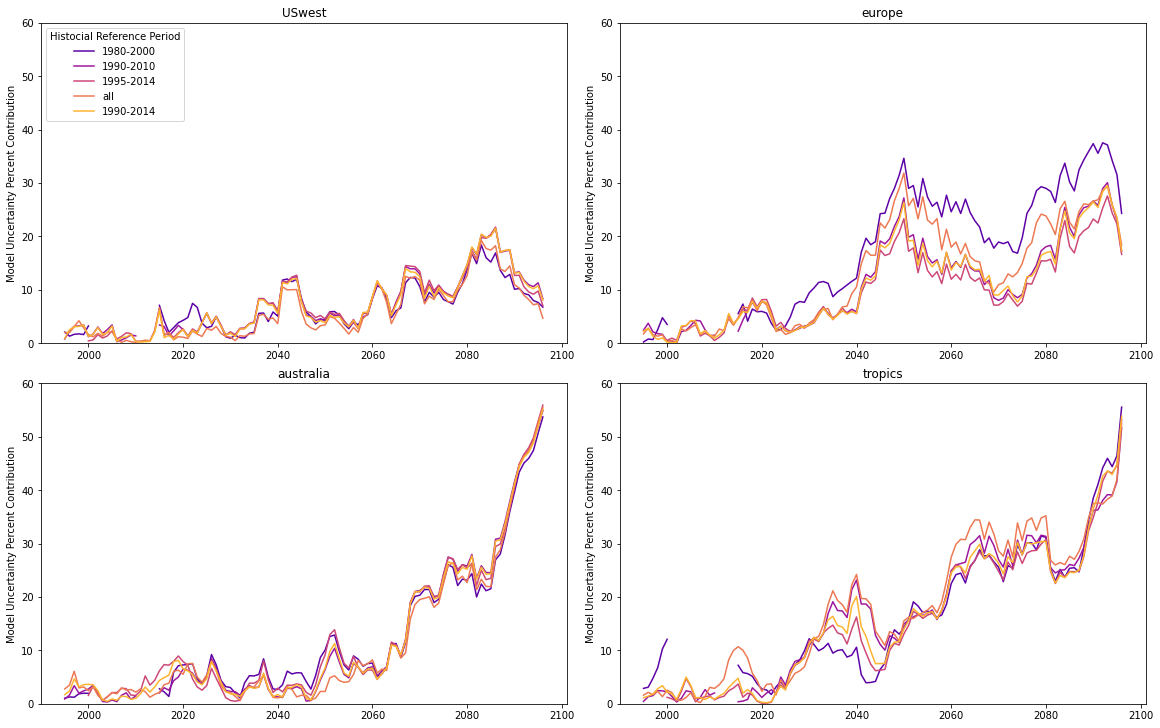

In [44]:
fig,ax = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(16,10))
colors = sns.color_palette("plasma", len(test_histslice.concat_dim))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
regions = ['USwest','europe','australia','tropics']
for axe,r in zip(axes,regions):
    for i in range(len(test_histslice.concat_dim)):
        axe.plot(test_histslice.sel(region=r).isel(concat_dim=i).time,
                 test_histslice.sel(region=r).isel(concat_dim=i).MTratio,
                c=colors[i])
        axe.set_ylabel('Model Uncertainty Percent Contribution')
        axe.set_title(r)
        axe.set_ylim(0,60)
labels = ['1980-2000','1990-2010','1995-2014','all','1990-2014']
ax[0,0].legend(labels=labels,loc=2,title='Histocial Reference Period')

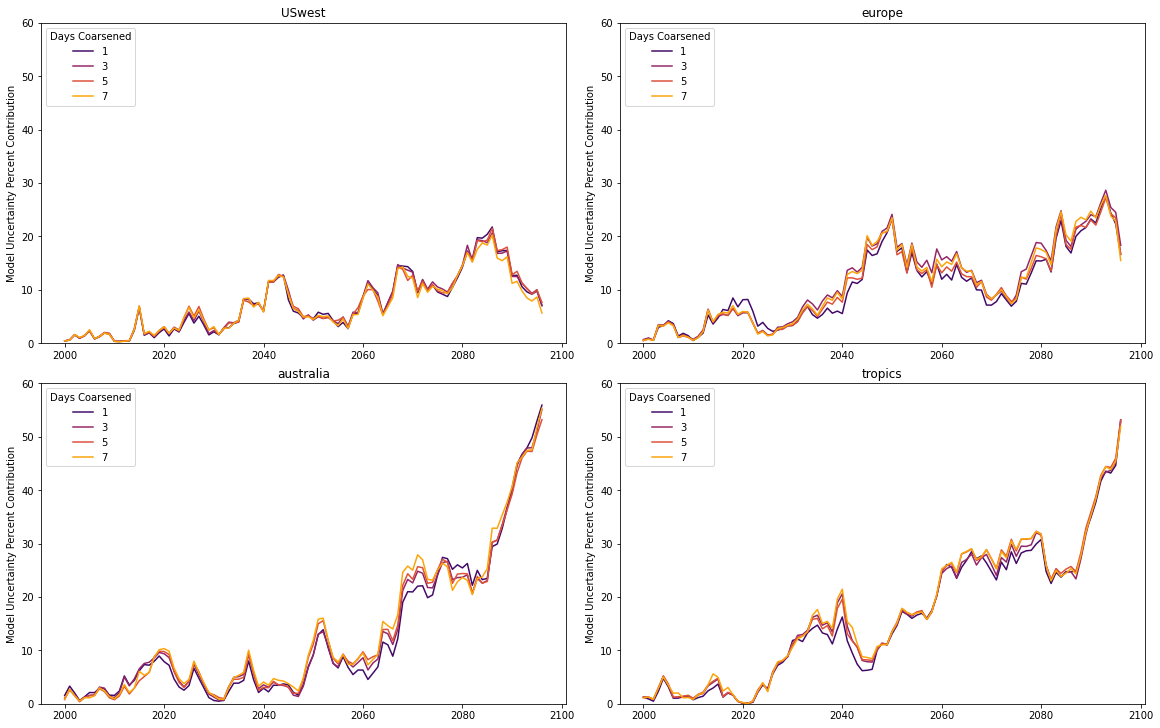

In [46]:
fig,ax = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(16,10))
colors = sns.color_palette("inferno", len(test_coarsen.concat_dim))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
regions = ['USwest','europe','australia','tropics']
for axe,r in zip(axes,regions):
    for i,m in enumerate(test_coarsen.concat_dim):
        axe.plot(test_coarsen.sel(region=r,concat_dim=m).time,test_coarsen.sel(region=r,concat_dim=m).MTratio,
                c=colors[i])
        labels=['1','3','5','7']
        axe.legend(labels=labels,loc=2,title='Days Coarsened')
        axe.set_ylabel('Model Uncertainty Percent Contribution')
        axe.set_title(r)
        axe.set_ylim(0,60)

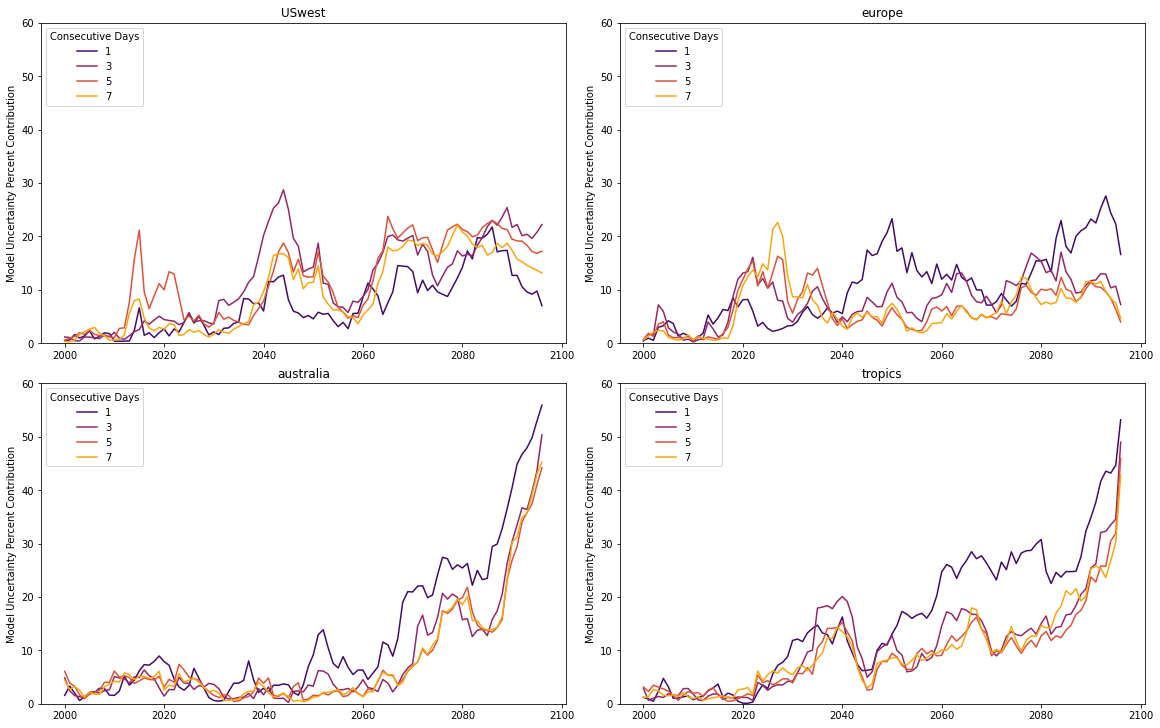

In [49]:
fig,ax = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(16,10))
colors = sns.color_palette("inferno", len(test_conseq.concat_dim))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
regions = ['USwest','europe','australia','tropics']
for axe,r in zip(axes,regions):
    for i,m in enumerate(test_conseq.concat_dim):
        axe.plot(test_conseq.sel(region=r,concat_dim=m).time,test_conseq.sel(region=r,concat_dim=m).MTratio,
                c=colors[i])
        labels=['1','3','5','7']
        axe.legend(labels=labels,loc=2,title='Consecutive Days')
        axe.set_ylabel('Model Uncertainty Percent Contribution')
        axe.set_title(r)
        axe.set_ylim(0,60)

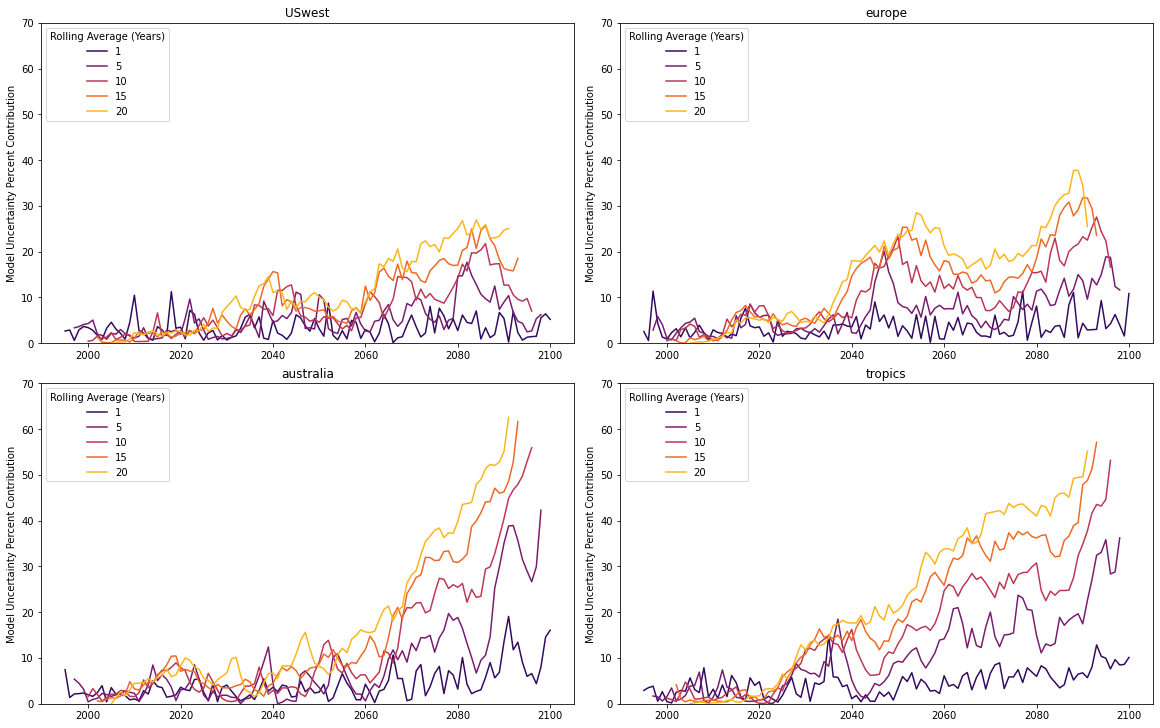

In [53]:
fig,ax = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(16,10))
colors = sns.color_palette("inferno", len(test_rolling.concat_dim))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
regions = ['USwest','europe','australia','tropics']
for axe,r in zip(axes,regions):
    for i,m in enumerate(test_rolling.concat_dim):
        axe.plot(test_rolling.sel(region=r,concat_dim=m).time,test_rolling.sel(region=r,concat_dim=m).MTratio,
                c=colors[i])
        labels=['1','5','10','15','20']
        axe.legend(labels=labels,loc=2,title='Rolling Average (Years)')
        axe.set_ylabel('Model Uncertainty Percent Contribution')
        axe.set_title(r)
        axe.set_ylim(0,70)

## Load Datasets - Local code 

In [90]:
# settings 
#for temp
# variable = 'tas'
# models = ['CanESM5','cesm_lens','MIROC6','MPI-ESM1-2-LR','EC-Earth3'] 

#for precip - still having issues getting EC-Earth data 
variable = 'pr'
models = ['CanESM5','cesm_lens','MIROC6','MPI-ESM1-2-LR'] 

In [91]:
# USeast = MultiModelLargeEnsemble(models=models,
#                                  variable=variable, granularity='day', lat=41.3, 
#                                  lon=-72.5,bucket='climateai_data_repository', 
#                                  path='tmp/internal_variability',
#                                  load=True)

In [92]:
USwest = MultiModelLargeEnsemble(models=models, scenario='ssp585',
                                 variable=variable, granularity='day', lat=37.7, lon=-122.4,
                                 bucket='climateai_data_repository', 
                                 path='tmp/internal_variability',
                                 load=True,single_member=False)

In [93]:
# iceland = MultiModelLargeEnsemble(models=models,
#                                  variable=variable, granularity='day', lat=65, lon=-19,
#                                  bucket='climateai_data_repository', 
#                                  path='tmp/internal_variability',
#                                  load=True)

In [94]:
europe = MultiModelLargeEnsemble(models=models,scenario='ssp585',
                                 variable=variable, granularity='day', lat=51,lon=10.5,
                                 bucket='climateai_data_repository', 
                                 path='tmp/internal_variability',
                                 load=True,single_member=False)

In [95]:
australia = MultiModelLargeEnsemble(models=models, scenario='ssp585',
                                 variable=variable, granularity='day', lat=-25.2,lon=133.7,
                                 bucket='climateai_data_repository', 
                                 path='tmp/internal_variability',
                                 load=True,single_member=False)

In [96]:
tropics = MultiModelLargeEnsemble(models=models,scenario='ssp585',
                                 variable=variable, granularity='day', lat=3.9,lon=-53.1,
                                 bucket='climateai_data_repository', 
                                 path='tmp/internal_variability',
                                 load=True,single_member=False)

### sensitivity testing
using model:internal ratio for testing the various parameters. When ratio > 1, model uncertainty dominates. When ratio < 1, internal variability dominates. 

### Return periods 

In [68]:
test_return = sensitivity_allregions(parameter='return_period',
                                     args = {'return_period':[5,10,20, 50, 100],
                                                'coarsen':1,
                                                'conseq_days':1,
                                                'rolling_average':10,
                                                'hist_slice':slice('1995','2014'),
                                             'postprocess':True
                                               })

In [69]:
test_return

<xarray.Dataset>
Dimensions:            (time: 86, member: 58, model: 5, concat_dim: 5, region: 4)
Coordinates:
  * time               (time) datetime64[ns] 2015-01-01 ... 2100-01-01
  * member             (member) int64 0 1 2 3 4 5 6 7 ... 51 52 53 54 55 56 57
    member_id          (model, member) object 'r16i1p2f1' ... 'r3i1p1f1'
  * model              (model) <U13 'CanESM5' 'cesm_lens' ... 'EC-Earth3'
    quantile           (concat_dim) float64 0.9995 0.9997 0.9999 0.9999 1.0
  * concat_dim         (concat_dim) int64 5 10 20 50 100
  * region             (region) <U9 'USwest' 'europe' 'australia' 'tropics'
Data variables: (12/17)
    tas_occurance      (region, concat_dim, model, member, time) float64 nan ...
    model_le           (region, concat_dim, time) float64 nan nan ... nan nan
    internal_mean_le   (region, concat_dim, time) float64 nan nan ... nan nan
    internal_var_le    (region, concat_dim, time) float64 nan nan ... nan nan
    total_le           (region, concat_dim, time) float64 nan nan ... nan nan
    total_direct_le    (region, concat_dim, time) float64 nan nan ... nan nan
    ...                 ...
    model_fit          (region, concat_dim, time) float64 nan nan ... nan nan
    total_fit          (region, concat_dim, time) float64 nan nan ... nan nan
    internal_fit_frac  (region, concat_dim, time) float64 nan nan ... nan nan
    model_fit_frac     (region, concat_dim, time) float64 nan nan ... nan nan
    total_direct_fit   (region, concat_dim, time) float64 nan nan ... nan nan
    MTratio            (region, concat_dim, time) float64 nan nan ... nan nan

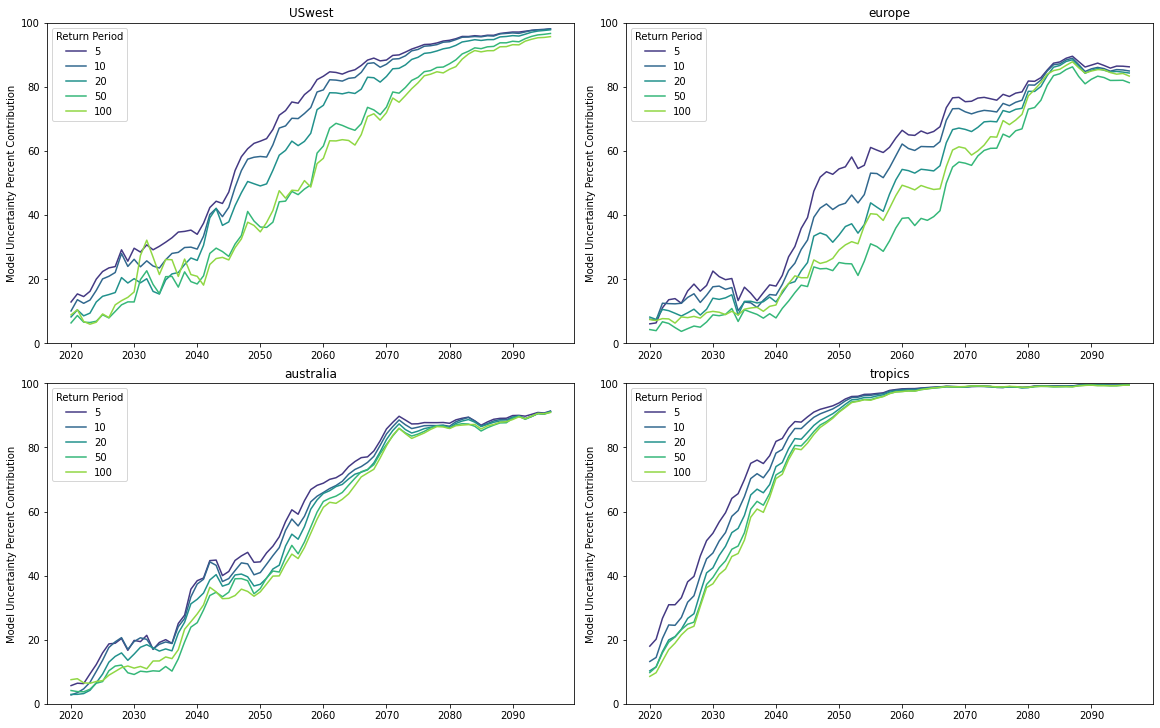

In [71]:
fig,ax = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(16,10))
colors = sns.color_palette("viridis", len(test_return.concat_dim))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
regions = ['USwest','europe','australia','tropics']
for axe,r in zip(axes,regions):
    for i,m in enumerate(test_return.concat_dim):
        axe.plot(test_return.sel(region=r,concat_dim=m).time,test_return.sel(region=r,concat_dim=m).model_le_frac,
                c=colors[i])
        labels=['5','10','20','50','100']
        axe.legend(labels=labels,loc=2,title='Return Period')
        axe.set_ylabel('Model Uncertainty Percent Contribution')
        axe.set_title(r)
        axe.set_ylim(0,100)
        # print(i)
        # model_frac = test_return.sel(region=r).model_le_frac
        # model_frac.plot(hue='concat_dim',c=colors[i],ax=axe,add_legend=False)
        

For temp: greater internal variability for larger return periods. US west and Europe have largest spreads. Convergence towards the end of the century for all return periods when model uncertainty dominates. This point is reached much earlier for the tropics. 

### Hist_slice

In [34]:
test_histslice = sensitivity_allregions(parameter='hist_slice',
                                        args = {'return_period':10,
                                                'coarsen':1,
                                                'conseq_days':1,
                                                'rolling_average':10,
                                                'hist_slice':[slice('1920','1940'),slice('1960','1980'),
                                                              slice('1990','2010'),slice('1995','2014'),
                                                              slice(None, None), slice('1990', None)],
                                               'postprocess':False}
                                       )

In [35]:
test_histslice

<xarray.Dataset>
Dimensions:            (time: 86, member: 50, model: 4, concat_dim: 6, region: 4)
Coordinates:
  * time               (time) datetime64[ns] 2015-01-01 ... 2100-01-01
  * member             (member) int64 0 1 2 3 4 5 6 7 ... 43 44 45 46 47 48 49
    member_id          (model, member) object 'r16i1p2f1' 'r16i1p1f1' ... nan
  * model              (model) <U13 'CanESM5' 'cesm_lens' ... 'MPI-ESM1-2-LR'
    quantile           (concat_dim) float64 0.9997 0.9997 ... 0.9997 0.9997
  * concat_dim         (concat_dim) object slice('1920', '1940', None) ... sl...
  * region             (region) <U9 'USwest' 'europe' 'australia' 'tropics'
Data variables: (12/17)
    pr_occurance       (region, concat_dim, model, member, time) float64 nan ...
    model_le           (region, concat_dim, time) float64 nan nan ... nan nan
    internal_mean_le   (region, concat_dim, time) float64 nan nan ... nan nan
    internal_var_le    (region, concat_dim, time) float64 nan nan ... nan nan
    total_le           (region, concat_dim, time) float64 nan nan ... nan nan
    total_direct_le    (region, concat_dim, time) float64 nan nan ... nan nan
    ...                 ...
    model_fit          (region, concat_dim, time) float64 nan nan ... nan nan
    total_fit          (region, concat_dim, time) float64 nan nan ... nan nan
    internal_fit_frac  (region, concat_dim, time) float64 nan nan ... nan nan
    model_fit_frac     (region, concat_dim, time) float64 nan nan ... nan nan
    total_direct_fit   (region, concat_dim, time) float64 nan nan ... nan nan
    MTratio            (region, concat_dim, time) float64 nan nan ... nan nan

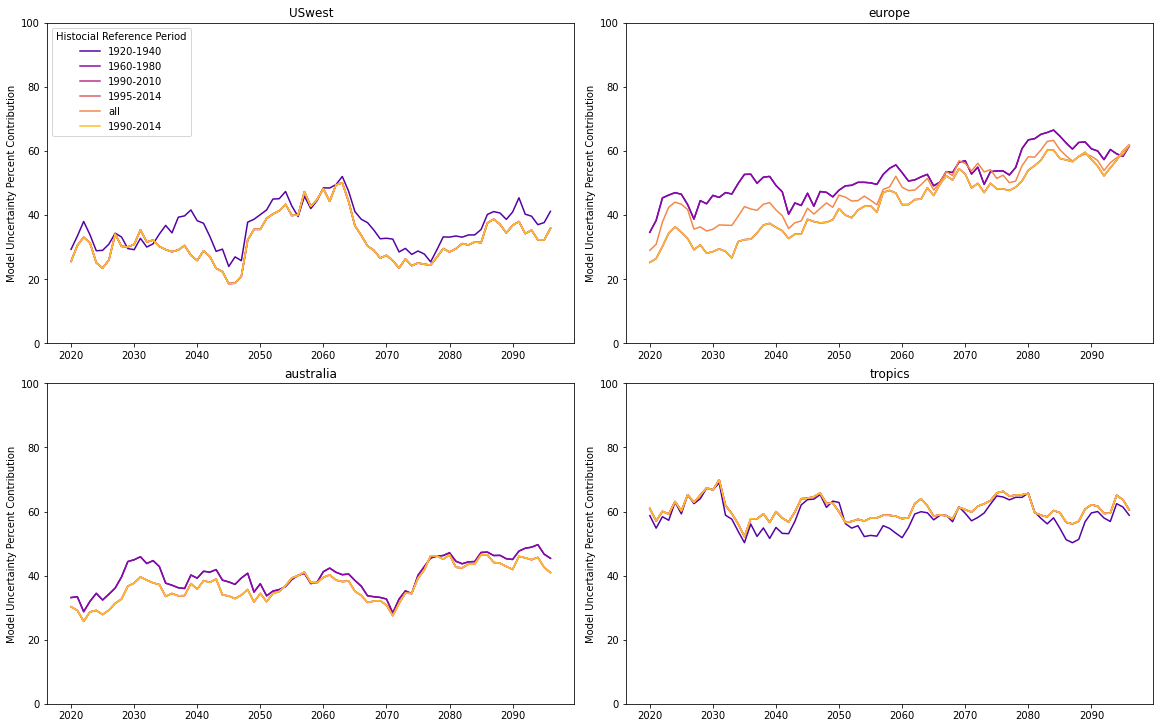

In [56]:
fig,ax = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(16,10))
colors = sns.color_palette("plasma", len(test_histslice.concat_dim))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
regions = ['USwest','europe','australia','tropics']
for axe,r in zip(axes,regions):
    for i in range(len(test_histslice.concat_dim)):
        axe.plot(test_histslice.sel(region=r).isel(concat_dim=i).time,test_histslice.sel(region=r).isel(concat_dim=i).model_le_frac,
                c=colors[i])
        axe.set_ylabel('Model Uncertainty Percent Contribution')
        axe.set_title(r)
        axe.set_ylim(0,100)
labels = ['1920-1940','1960-1980','1990-2010','1995-2014','all','1990-2014']
ax[0,0].legend(labels=labels,loc=2,title='Histocial Reference Period')

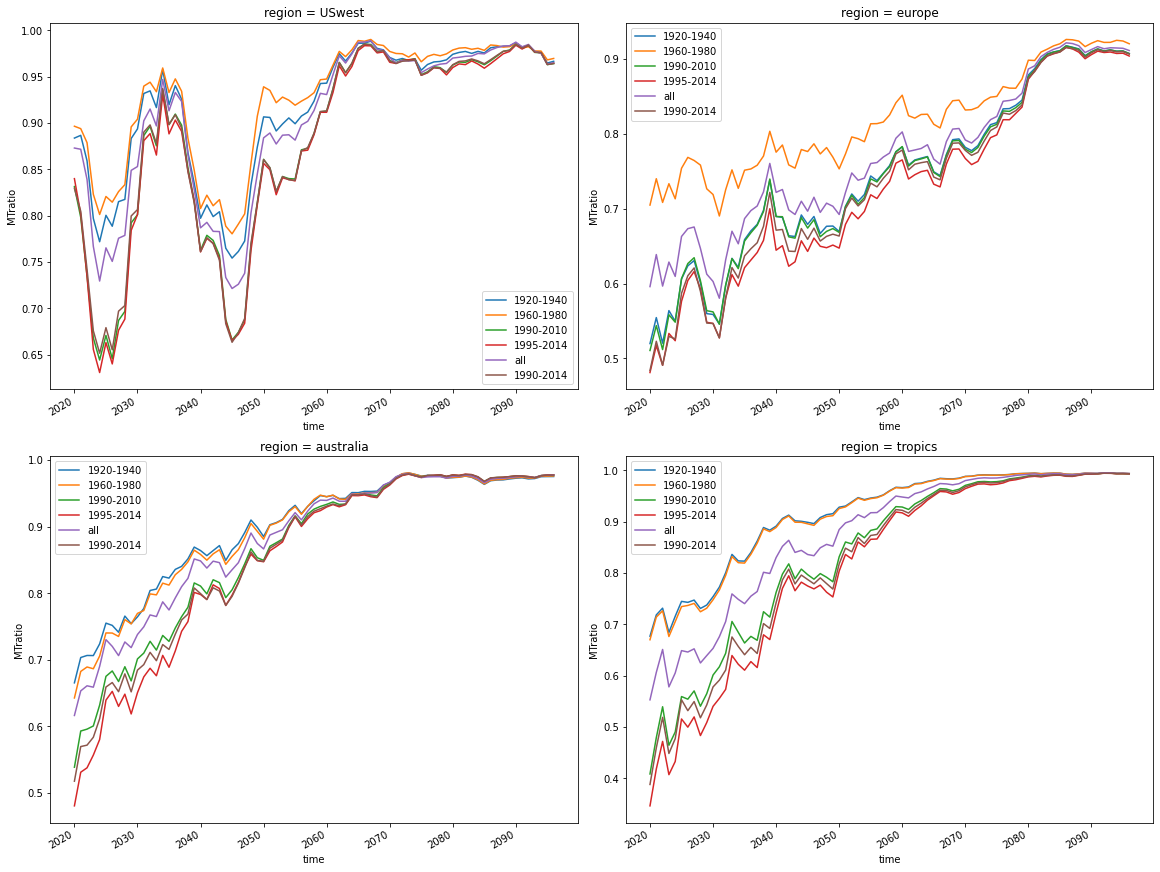

In [34]:
fig,ax = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(16,12))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
regions = ['USwest','europe','australia','tropics']
for axe,r in zip(axes,regions):
    test_histslice.sel(region=r).MTratio.plot(hue='concat_dim',ax=axe,add_legend=False);
    labels = ['1920-1940','1960-1980','1990-2010','1995-2014','all','1990-2014']
    axe.legend(labels)

### coarsen

In [72]:
test_coarsen = sensitivity_allregions(parameter='coarsen',
                                    args = {'return_period':10,
                                            'coarsen':[1,3,5,7],
                                            'conseq_days':1,
                                            'rolling_average':10,
                                            'hist_slice':slice('1995','2014'),
                                            'postprocess':True
                                           })

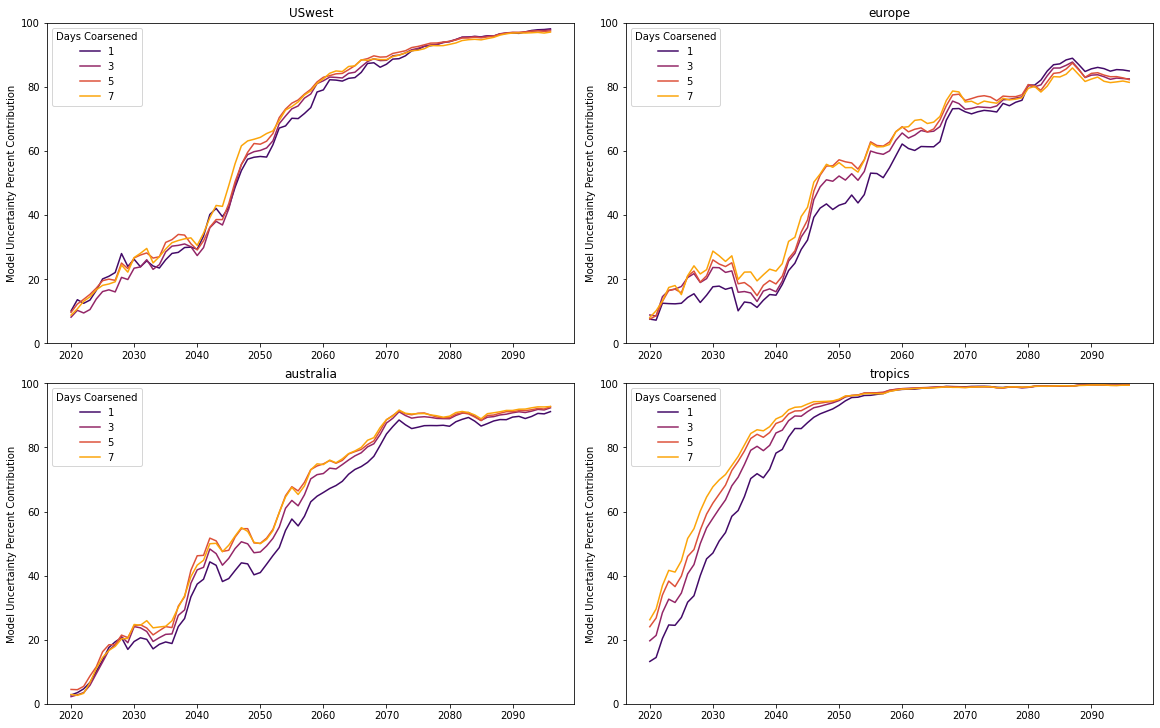

In [74]:
fig,ax = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(16,10))
colors = sns.color_palette("inferno", len(test_coarsen.concat_dim))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
regions = ['USwest','europe','australia','tropics']
for axe,r in zip(axes,regions):
    for i,m in enumerate(test_coarsen.concat_dim):
        axe.plot(test_coarsen.sel(region=r,concat_dim=m).time,test_coarsen.sel(region=r,concat_dim=m).model_le_frac,
                c=colors[i])
        labels=['1','3','5','7']
        axe.legend(labels=labels,loc=2,title='Days Coarsened')
        axe.set_ylabel('Model Uncertainty Percent Contribution')
        axe.set_title(r)
        axe.set_ylim(0,100)
        # print(i)
        # model_frac = test_return.sel(region=r).model_le_frac
        # model_frac.plot(hue='concat_dim',c=colors[i],ax=axe,add_legend=False)
        

### Consecutive days 

In [84]:
test_conseq = sensitivity_allregions(parameter='conseq_days',
                       args= {'return_period':10,
                              'coarsen':1,
                              'conseq_days':[1,3,5,7],
                              'rolling_average':10,
                              'hist_slice':slice('1995','2014'),
                              'postprocess':True
                             }
                      )

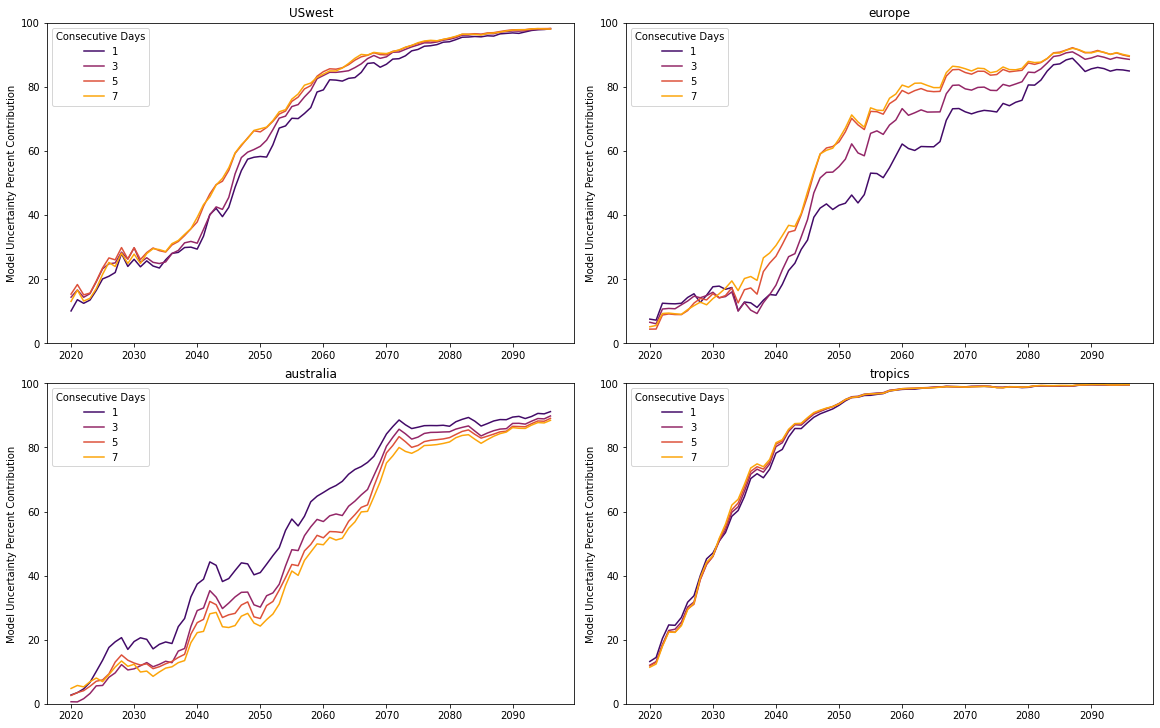

In [77]:
fig,ax = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(16,10))
colors = sns.color_palette("inferno", len(test_conseq.concat_dim))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
regions = ['USwest','europe','australia','tropics']
for axe,r in zip(axes,regions):
    for i,m in enumerate(test_conseq.concat_dim):
        axe.plot(test_conseq.sel(region=r,concat_dim=m).time,test_conseq.sel(region=r,concat_dim=m).model_le_frac,
                c=colors[i])
        labels=['1','3','5','7']
        axe.legend(labels=labels,loc=2,title='Consecutive Days')
        axe.set_ylabel('Model Uncertainty Percent Contribution')
        axe.set_title(r)
        axe.set_ylim(0,100)
        # print(i)
        # model_frac = test_return.sel(region=r).model_le_frac
        # model_frac.plot(hue='concat_dim',c=colors[i],ax=axe,add_legend=False)

#### coarsen / consec combo

In [97]:
test_conseq = extreme_internal_allregions(
                       args= {'return_period':10,
                              'coarsen':3,
                              'conseq_days':7,
                              'rolling_average':10,
                              'hist_slice':slice('1995','2014'),
                              'postprocess':True
                             }
                      )

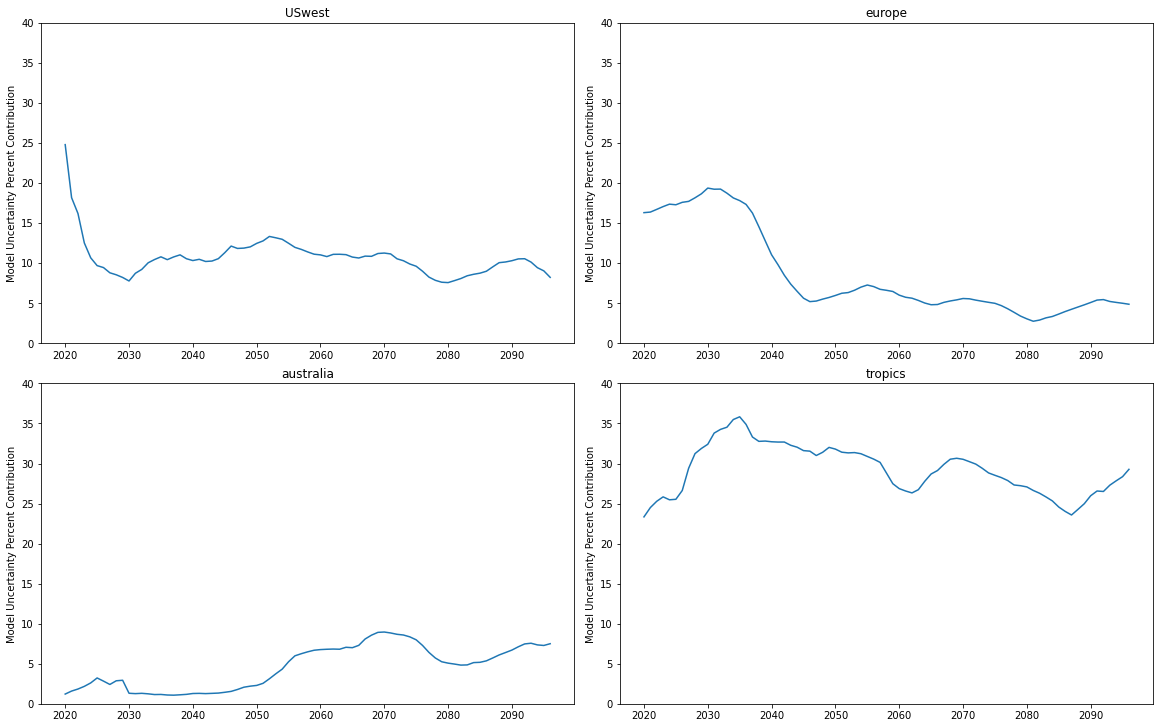

In [99]:
fig,ax = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(16,10))
# colors = sns.color_palette("inferno", len(test_conseq.concat_dim))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
regions = ['USwest','europe','australia','tropics']
for axe,r in zip(axes,regions):
    axe.plot(test_conseq.sel(region=r).time,test_conseq.sel(region=r).model_le_frac)
        # axe.legend(labels=labels,loc=2,title='Consecutive Days')
    axe.set_ylabel('Model Uncertainty Percent Contribution')
    axe.set_title(r)
    axe.set_ylim(0,40)
        # print(i)
        # model_frac = test_return.sel(region=r).model_le_frac
        # model_frac.plot(hue='concat_dim',c=colors[i],ax=axe,add_legend=False)

### rolling average

In [78]:
test_rolling = sensitivity_allregions(parameter='rolling_average',
                                        args = {'return_period':10,
                                                'coarsen':1,
                                                'conseq_days':1,
                                                'rolling_average':[1,5,10,15,20],
                                                'hist_slice':slice('1995','2014'),
                                                'postprocess':True
                                               }
                                     )

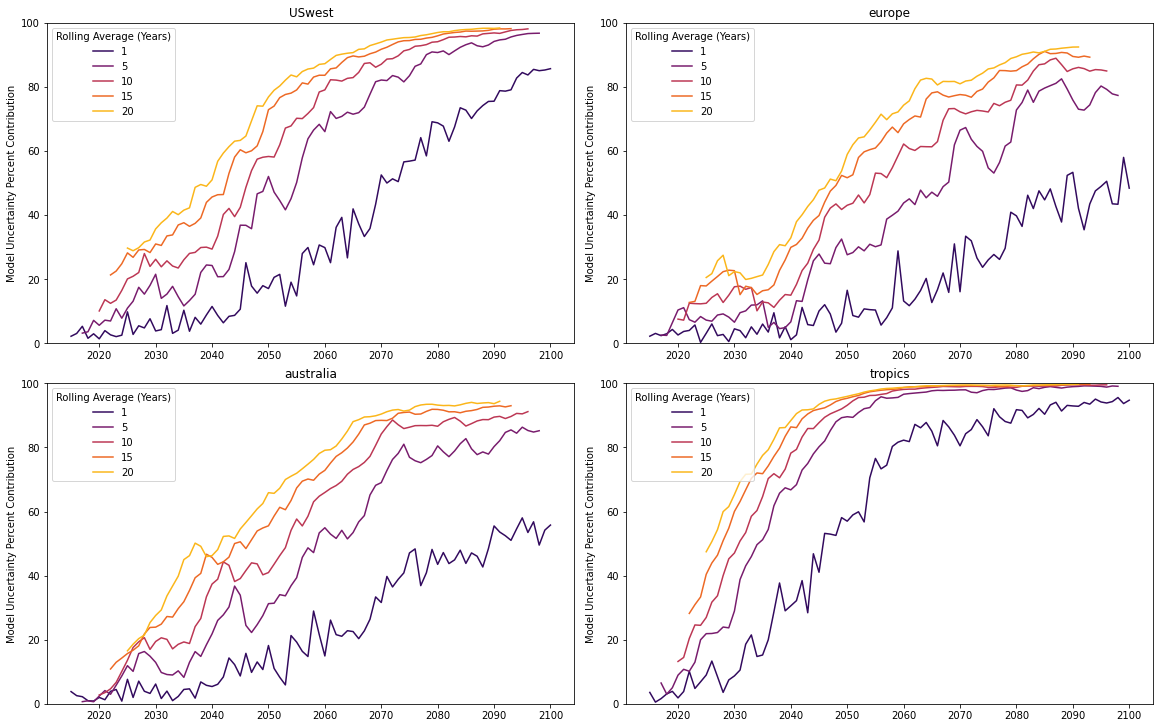

In [80]:
fig,ax = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(16,10))
colors = sns.color_palette("inferno", len(test_rolling.concat_dim))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
regions = ['USwest','europe','australia','tropics']
for axe,r in zip(axes,regions):
    for i,m in enumerate(test_rolling.concat_dim):
        axe.plot(test_rolling.sel(region=r,concat_dim=m).time,test_rolling.sel(region=r,concat_dim=m).model_le_frac,
                c=colors[i])
        labels=['1','5','10','15','20']
        axe.legend(labels=labels,loc=2,title='Rolling Average (Years)')
        axe.set_ylabel('Model Uncertainty Percent Contribution')
        axe.set_title(r)
        axe.set_ylim(0,100)
        # print(i)
        # model_frac = test_return.sel(region=r).model_le_frac
        # model_frac.plot(hue='concat_dim',c=colors[i],ax=axe,add_legend=False)